### Problem 1 (Loss Functions)

#### Example 1
One case in which we might not want to use quadratic loss is building an automatic classifier for credit card approval.

The input space might include 5 features, the first being the applicant's age (any natural number, denoted by the space R), the second being the applicant's gender (binary, -1 for male and +1 for female), the third being the applicant's annual income (categorical feature, with 0 being below $5000, 1 being between $5000 and $10000, 2 being between $10000 and $100000, and 3 being above $100000), the fourth being the applicant's family size (categorical feature, with 0 being alone, 1 being size of 2, 2 being size of 3, 4 being size of 5, and 5 being size of above 5), the fifth being the applicant's highest degree achieved (categorical feature, with 0 being some middle school or below, 1 being middle school, 2 being high school, 3 being college, and 4 being above college). The output space is binary, with -1 being denial and +1 being approval.

I will use one-hot encoding to transform all my non-binary categorical features into individual binary features. I would use hinge loss with a quadratic regularizer. This is because I am tryig to find the best linear separating hyperplane (trying to maximize the margin) while allowing some mistakes. This is called the soft-margined support vector machine. I might use random search to find the best hyperparameters for this model.

#### Example 2
One case in which we might not want to use quadratic loss is building an automatic housing price prediction system.

The input space might include 4 features, the first being the houses's area (any natural number representing the area rounded to the nearest square meter), the second being the house's age (any natural number representing the age rounded to the nearest year), the third being the house's number of bedrooms (any natural number representing the number of bedrooms), the fourth being the house's distance to the nearest school (any natural number representing the distance rounded to the nearest kilometer). The output space might be any positve real number representing the house's price.

I will use absolute loss with quadratic regularizer to solve this task. I use absolute loss because it it less sensitive to outliers (won't square the error that makes the loss explode for an outlier). I use quadratic regularizer to encourage my w to be small and thus avoid overfitting. I might use random search to find the best hyperparameters for this model.

### Problem 2 (Quantile Regression)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("birthSample_1000.txt")
df = df.set_index(df.columns[0])

In [3]:
df.head()

,MaritalStatus,PrenatalCare,Male,Weight
Unnamed: 0,,,,
3971,1,1,1,2983
5717,1,1,0,3471
1325,1,1,1,3818
3265,0,0,0,3204
8233,0,1,1,3600


In [4]:
df.nunique()

MaritalStatus      2
PrenatalCare       2
Male               2
Weight           472
dtype: int64

In [5]:
n = len(df)

In [6]:
y = np.asarray(df['Weight'])
X = np.asarray(df[['MaritalStatus','Male','PrenatalCare']])

In [7]:
ys = y - np.mean(y)
ys = ys / np.std(y)

Xs = X - X.mean(axis=0)
Xs = Xs * np.std(Xs, axis=0)**-1

Use this helper function to print out the coefficents of the intercept and weight vector.

In [8]:
def print_coefs(results):
    print('Intercept coefficient:\t', results.intercept_)
    for i in range(len(df.columns[:-1])):
        print('Coefficient of', df.columns[i], ':\t', results.coef_[i])

### a) Fit a least squares regression 
Use least squares to predict birth weight using baby's gender, mother’s marital status, and prenatal care in the first trimester as features. (Include an offset.) Interpret the coefficients that you find. What do they mean about the relationship between each variable and birth weight?

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)

In [11]:
print_coefs(reg)

Intercept coefficient:	 3137.1953406676153
Coefficient of MaritalStatus :	 146.39690558259454
Coefficient of PrenatalCare :	 82.74005058626202
Coefficient of Male :	 101.17507124567997


__Response__: All the coefficient are positive, meaning that there is a positive correlation between weight and each of the variables. The more positive the coefficient is, the stronger the positive correlation is. Thus, the coefficients tell me that a baby with MaritalStatus = 1 is likely to have a higher weight than a baby with MaritalStatus = 0. A baby with PrenatalCare = 1 is likely to have a higher weight than a baby with Prenatal = 0. A baby with Male = 1 is likely to have a higher weight than a baby with Male = 0. The correlation is stronger with MaritalStatus, less strong with Male, and least strong with Prenatal. The intercept coefficient is the value of the predicted weigtht when all features are zero after scaling.

### b) Fit a quantile regression on the data with $q=0.05$ and $q=0.95$. What do these models predict, and how does it diﬀer from the prediction of the least squares regression? Compare these coeﬃcients to those you found in part a).

For this problem, use sklearn.linear_model.QuantileRegressor with a regularization coefficient of 0. 


In [12]:
from sklearn.linear_model import QuantileRegressor

In [13]:
qreg1 = QuantileRegressor(quantile = 0.05, alpha = 0).fit(X, y)

/Users/zhaiguankai/anaconda3/envs/ORIE4741/lib/python3.8/site-packages/sklearn/linear_model/_quantile.py:268: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(


In [14]:
print_coefs(qreg1)

Intercept coefficient:	 2075.0037921298
Coefficient of MaritalStatus :	 457.6934064529983
Coefficient of PrenatalCare :	 -9.698987004009723
Coefficient of Male :	 172.83333657585626


In [15]:
qreg2 = QuantileRegressor(quantile = 0.95, alpha = 0).fit(X, y)

In [16]:
print_coefs(qreg2)

Intercept coefficient:	 3935.999834840759
Coefficient of MaritalStatus :	 61.000022669012424
Coefficient of PrenatalCare :	 193.99991251695553
Coefficient of Male :	 146.00014074262577


__Response__: The intercept and coefficients are different each time. Intercept is the highest for the 95-quantile regression, less high for the OLS, and least high for the 5-quantile regression. This makes sense as the two quantile regression models respectively predict the 5-th percentile weight and the 95th percentile weight, while the OLS predicts the average. The coefficients are also different for this reason.

### c) Fit quantile regressions for $q=0.05, 0.10, \cdots, 0.95$.
This step may take a while.

In [17]:
qs = np.arange(0.05, 0.96, 0.05)
coefs = np.zeros((19, 4))
for i in range(len(qs)):
    qreg = QuantileRegressor(quantile = qs[i], alpha = 0).fit(X, y)
    for j in range(4):
        if j == 0:
            coefs[i, j] = qreg.intercept_
        else:
            coefs[i, j] = qreg.coef_[j-1]

/Users/zhaiguankai/anaconda3/envs/ORIE4741/lib/python3.8/site-packages/sklearn/linear_model/_quantile.py:268: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
/Users/zhaiguankai/anaconda3/envs/ORIE4741/lib/python3.8/site-packages/sklearn/linear_model/_quantile.py:268: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required t

In [18]:
qs

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [19]:
coefs[2]

array([2729.87963631,  114.99999999,   29.9999999 ,   75.12036308])

### d) Create an intercept plot that plots quantiles against the intercept coefficient from that quantile regression. Create coefficient plots for MaritalStatus, Male, and PrenatalCare coefficients.


In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Intercept')

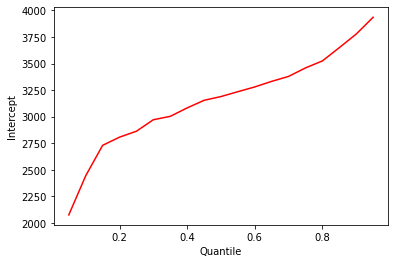

In [21]:
plt.plot(qs, coefs[:,0], 'r')
plt.xlabel('Quantile')
plt.ylabel('Intercept')

Text(0, 0.5, 'Coef for MaritalStatus')

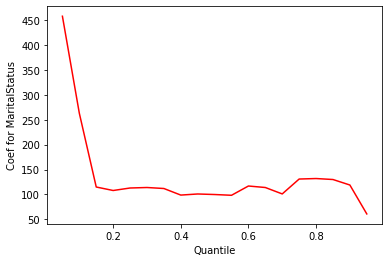

In [22]:
plt.plot(qs, coefs[:,1], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for MaritalStatus')

Text(0, 0.5, 'Coef for PrenatalCare')

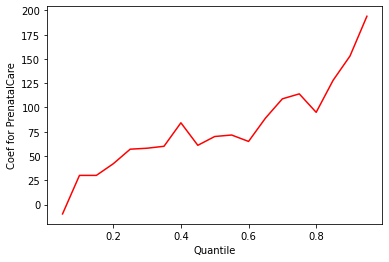

In [23]:
plt.plot(qs, coefs[:,2], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for PrenatalCare')

Text(0, 0.5, 'Coef for Male')

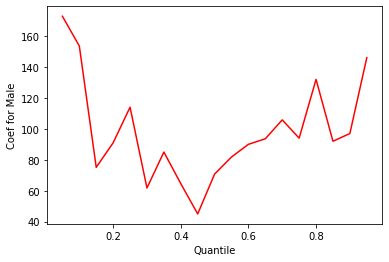

In [24]:
plt.plot(qs, coefs[:,3], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for Male')

### e) How should you interpret the intercepts of the quantile regressions?

__Response__: The intercepts of the quantile regression constantly increases as the quantile parameter increases. This is because as the quantile parameter increases, we care more about examples on which our model's prediction is lower than the actual weight. Thus our predictions tend to be higher for regressors with a higher quantile parameter, thus having a larger intercept.

### f) What does the coefficient plot tell you about the effect of prenatal care for infants with low birth weight compared to those with average birth weights?

__Response__: the effect of prenatal care for infants with low birth weight is smaller compared to those with average birth weights.